In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Multiple Linear Regression

In [3]:
house1 = pd.read_csv('Desktop/house_rental_dataUC.csv')
house1 = house1.drop(['Unnamed: 0'], axis=1)
house1.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000


In [4]:
X_1 = house1.drop(['TotalFloor', 'Bedroom', 'Bathroom', 'Price'], axis=1)
y = house1['Price'].values.reshape(-1,1)
X_1.head(3)

,Sqft,Floor,Living.Room
0,1177.698,2,2
1,2134.800,5,2
2,1138.560,5,2


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25)
print (X_train.shape, X_test.shape)

(483, 3) (162, 3)


In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print (reg.coef_[0])
print (reg.intercept_)

[   39.64764903  1224.5892695  -3671.40692803]
[1471.46660339]


In [8]:
coef1 = pd.DataFrame (reg.coef_[0], X_1.columns, columns = ['Coefficient'])
coef1

,Coefficient
Sqft,39.647649
Floor,1224.589270
Living.Room,-3671.406928


In [9]:
print ("the linear model is: Price = {:.5} + {:.5}*Sqft + {:.5}*Floor + {:.5}*Living.Room". format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

the linear model is: Price = 1471.5 + 39.648*Sqft + 1224.6*Floor + -3671.4*Living.Room


In [10]:
Price = 1471.5 + 39.648*1 + 1224.6*1 + -3671.4*1
Price

-935.6520000000005

In [11]:
reg.score(X_1,y)

0.6983350160088508

In [12]:
from sklearn import metrics

In [13]:
y_pred = reg.predict(X_test)

In [14]:
print ("Mean Absolute Error", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 15115.790213781944


In [15]:
print ("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 20263.372428074646


In [16]:
X = np.column_stack((house1['Sqft'], house1['Floor'], house1['Living.Room']))
y= house1['Price']

In [17]:
import statsmodels.api as sm

In [18]:
X_2 = sm.add_constant(X)
X_2

array([[1.000000e+00, 1.177698e+03, 2.000000e+00, 2.000000e+00],
       [1.000000e+00, 2.134800e+03, 5.000000e+00, 2.000000e+00],
       [1.000000e+00, 1.138560e+03, 5.000000e+00, 2.000000e+00],
       ...,
       [1.000000e+00, 7.400640e+02, 1.300000e+01, 1.000000e+00],
       [1.000000e+00, 1.707840e+03, 3.000000e+00, 2.000000e+00],
       [1.000000e+00, 1.376946e+03, 6.000000e+00, 2.000000e+00]])

In [19]:
reg_sm =sm.OLS(y,X_2)
reg_fit = reg_sm.fit()

In [20]:
print (reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     497.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          8.18e-167
Time:                        06:12:02   Log-Likelihood:                -7287.4
No. Observations:                 645   AIC:                         1.458e+04
Df Residuals:                     641   BIC:                         1.460e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2848.1530   3365.662      0.846      0.3

In [21]:
X_1 = house1.drop(['TotalFloor','Living.Room', 'Bedroom', 'Bathroom', 'Price'], axis=1)
y = house1['Price'].values.reshape(-1,1)
X_1.head(3)

,Sqft,Floor
0,1177.698,2
1,2134.800,5
2,1138.560,5


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25)
print (X_train.shape, X_test.shape)

(483, 2) (162, 2)


In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print (reg.coef_[0])
print (reg.intercept_)

[  37.33204347 1238.32006158]
[-1940.18415608]


In [26]:
coef_1 = pd.DataFrame (reg.coef_[0], X_1.columns, columns = ['Coefficient'])
coef_1

,Coefficient
Sqft,37.332043
Floor,1238.320062


In [27]:
print ("the linear model is: Price = {:.5} + {:.5}*Sqft + {:.5}*Floor". format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))

the linear model is: Price = -1940.2 + 37.332*Sqft + 1238.3*Floor


In [28]:
Price = -1940.2 + 37.332*1 + 1238.3*1
Price

-664.568

In [29]:
reg.score(X_1,y)

0.6975517254814843

In [30]:
from sklearn import metrics
y_pred = reg.predict(X_test)

In [31]:
print ("Mean Absolute Error", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 13959.974583432739


In [32]:
print ("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 17599.48939466903


In [33]:
X = np.column_stack((house1['Sqft'], house1['Floor']))
y= house1['Price']

In [34]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
X2

array([[1.000000e+00, 1.177698e+03, 2.000000e+00],
       [1.000000e+00, 2.134800e+03, 5.000000e+00],
       [1.000000e+00, 1.138560e+03, 5.000000e+00],
       ...,
       [1.000000e+00, 7.400640e+02, 1.300000e+01],
       [1.000000e+00, 1.707840e+03, 3.000000e+00],
       [1.000000e+00, 1.376946e+03, 6.000000e+00]])

In [35]:
reg_sm =sm.OLS(y,X_2)
reg_fit = reg_sm.fit()
print (reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     497.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          8.18e-167
Time:                        06:21:05   Log-Likelihood:                -7287.4
No. Observations:                 645   AIC:                         1.458e+04
Df Residuals:                     641   BIC:                         1.460e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2848.1530   3365.662      0.846      0.3

In [36]:
house1.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000


In [37]:
X1 = house1.drop(['Floor','TotalFloor','Price'], axis=1)
y = house1['Price'].values.reshape(-1,1)
X1.head(3)

,Sqft,Bedroom,Living.Room,Bathroom
0,1177.698,2,2,2
1,2134.800,4,2,2
2,1138.560,2,2,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25)
print (X_train.shape, X_test.shape)

(483, 4) (162, 4)


In [39]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print (reg.coef_[0])
print (reg.intercept_)

[   39.80321461 -2488.78035057 -4804.57693307  3568.50489595]
[10445.57378692]


In [41]:
coef_new = pd.DataFrame (reg.coef_[0], X1.columns, columns = ['Coefficient'])
coef_new

,Coefficient
Sqft,39.803215
Bedroom,-2488.780351
Living.Room,-4804.576933
Bathroom,3568.504896


In [45]:
print ("the linear model is: Price = {:.7} + {:.5}*Sqft + {:.5}*Bedroom +{:.5}*Living.Room + {:.5}*Bathroom". format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3]))

the linear model is: Price = 10445.57 + 39.803*Sqft + -2488.8*Bedroom +-4804.6*Living.Room + 3568.5*Bathroom


In [46]:
Price = 10445.57 + 39.803*1 + -2488.8*1 +-4804.6*1 + 3568.5*1
Price    

6760.472999999999

In [47]:
reg.score(X1,y)

0.6868225843326735

In [48]:
from sklearn import metrics
y_pred = reg.predict(X_test)

In [49]:
print ("Mean Absolute Error", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error 14180.770201027824


In [50]:
print ("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error 19037.930847931653


In [51]:
X = np.column_stack((house1['Sqft'], house1['Bedroom'], house1['Living.Room'], house1['Bathroom']))
y= house1['Price']

In [52]:
import statsmodels.api as sm
X2_1 = sm.add_constant(X)
X2_1

array([[1.000000e+00, 1.177698e+03, 2.000000e+00, 2.000000e+00,
        2.000000e+00],
       [1.000000e+00, 2.134800e+03, 4.000000e+00, 2.000000e+00,
        2.000000e+00],
       [1.000000e+00, 1.138560e+03, 2.000000e+00, 2.000000e+00,
        1.000000e+00],
       ...,
       [1.000000e+00, 7.400640e+02, 1.000000e+00, 1.000000e+00,
        1.000000e+00],
       [1.000000e+00, 1.707840e+03, 3.000000e+00, 2.000000e+00,
        2.000000e+00],
       [1.000000e+00, 1.376946e+03, 3.000000e+00, 2.000000e+00,
        1.000000e+00]])

In [53]:
reg_sm =sm.OLS(y,X_2)
reg_fit = reg_sm.fit()
print (reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     497.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          8.18e-167
Time:                        06:41:46   Log-Likelihood:                -7287.4
No. Observations:                 645   AIC:                         1.458e+04
Df Residuals:                     641   BIC:                         1.460e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2848.1530   3365.662      0.846      0.3

In [ ]:
# Polynomial Regression

In [54]:
house1.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000


In [55]:
X1.head(3)

,Sqft,Bedroom,Living.Room,Bathroom
0,1177.698,2,2,2
1,2134.800,4,2,2
2,1138.560,2,2,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state=0)

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: x and y must be the same size

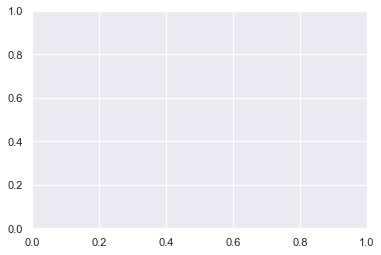

In [58]:
plt.scatter (X, y, color ='green')
plt.plot (X, lin_reg.predict(X), color= 'red')
plt.title ("LR_Poly_House")
plt.xlabel ('House Features')
plt.ylabel ('Price')
plt.show()

In [66]:
X = house1.loc[:,'Sqft'].values.reshape(-1,1) 
y = house1.loc[:, 'Price'].values.reshape(-1,1)

In [67]:
X

array([[1177.698],
       [2134.8  ],
       [1138.56 ],
       [1458.78 ],
       [ 967.776],
       [1127.886],
       [1352.04 ],
       [ 757.854],
       [1152.792],
       [1423.2  ],
       [ 668.904],
       [ 711.6  ],
       [1352.04 ],
       [ 818.34 ],
       [2134.8  ],
       [2768.124],
       [ 711.6  ],
       [ 462.54 ],
       [2739.66 ],
       [1174.14 ],
       [2490.6  ],
       [2768.124],
       [ 747.18 ],
       [1668.702],
       [3664.74 ],
       [1779.   ],
       [3664.74 ],
       [3059.88 ],
       [ 533.7  ],
       [ 853.92 ],
       [1732.746],
       [1245.3  ],
       [2134.8  ],
       [1206.162],
       [ 861.036],
       [ 462.54 ],
       [ 434.076],
       [ 768.528],
       [3735.9  ],
       [ 889.5  ],
       [3063.438],
       [ 925.08 ],
       [1174.14 ],
       [1352.04 ],
       [1771.884],
       [1601.1  ],
       [1487.244],
       [2277.12 ],
       [3735.9  ],
       [ 711.6  ],
       [2241.54 ],
       [1494.36 ],
       [ 711

In [68]:
y

array([[ 62000],
       [ 78000],
       [ 58000],
       [ 45000],
       [ 45000],
       [148000],
       [ 58000],
       [ 48000],
       [ 45000],
       [ 65000],
       [ 31000],
       [ 29002],
       [ 39000],
       [ 48000],
       [ 55000],
       [100000],
       [ 48000],
       [ 25000],
       [ 90000],
       [ 33000],
       [140000],
       [100000],
       [ 55000],
       [105000],
       [200000],
       [ 98000],
       [200000],
       [145000],
       [ 25000],
       [ 24028],
       [ 65000],
       [ 85000],
       [ 55000],
       [ 57000],
       [ 46000],
       [ 52000],
       [ 43500],
       [ 60000],
       [200000],
       [ 36000],
       [145000],
       [ 48000],
       [ 36000],
       [ 65000],
       [ 70000],
       [ 50000],
       [ 47999],
       [ 80000],
       [200000],
       [ 24030],
       [ 76000],
       [ 70000],
       [ 32500],
       [ 30032],
       [180000],
       [ 80000],
       [ 36000],
       [ 36000],
       [ 29032

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

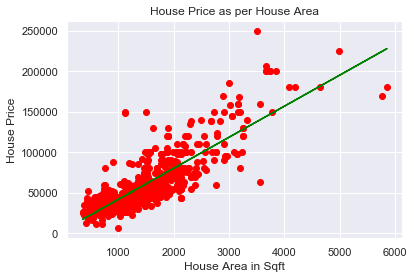

In [71]:
plt.scatter (X, y, color ='red')
plt.plot (X, lin_reg.predict(X), color= 'green')
plt.title ("House Price as per House Area")
plt.xlabel ('House Area in Sqft')
plt.ylabel ('House Price')
plt.show()

In [73]:
X = house1.loc[:,'Bedroom'].values.reshape(-1,1) 
y = house1.loc[:, 'Price'].values.reshape(-1,1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

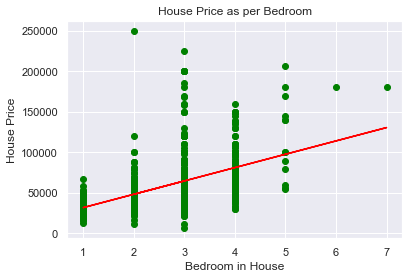

In [76]:
plt.scatter (X, y, color ='green')
plt.plot (X, lin_reg.predict(X), color= 'red')
plt.title ("House Price as per Bedroom")
plt.xlabel ('Bedroom in House')
plt.ylabel ('House Price')
plt.show()

In [77]:
X = house1.loc[:,'Floor'].values.reshape(-1,1) 
y = house1.loc[:, 'Price'].values.reshape(-1,1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

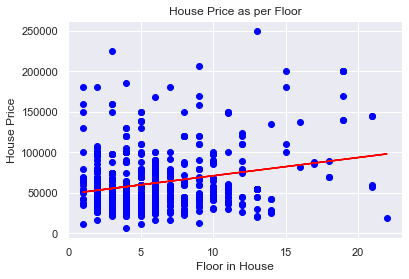

In [80]:
plt.scatter (X, y, color ='blue')
plt.plot (X, lin_reg.predict(X), color= 'red')
plt.title ("House Price as per Floor")
plt.xlabel ('Floor in House')
plt.ylabel ('House Price')
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly_reg = PolynomialFeatures (degree = 5)
x_poly = poly_reg.fit_transform(X)

In [83]:
pol_reg = LinearRegression()
pol_reg.fit (x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

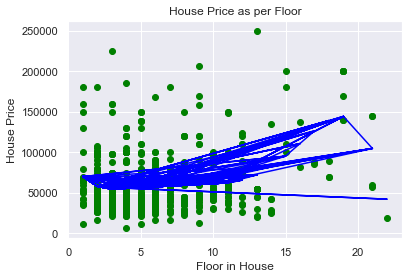

In [84]:
plt.scatter(X, y, color='green')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title ("House Price as per Floor")
plt.xlabel ('Floor in House')
plt.ylabel ('House Price')
plt.show()

In [86]:
lin_reg.predict([[25]])

array([[104745.56635246]])

In [87]:
pol_reg.predict(poly_reg.fit_transform([[25]]))

array([[-470684.76354007]])

In [ ]:
#so with the data used in X & y, can't find any essence of polynomial regression

In [ ]:
#Ridge Regression

In [89]:
X_new = house1.drop(['Price'], axis=1)
Y_new = house1['Price']
X_new.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1


In [91]:
Y_new.head(3)

0    62000
1    78000
2    58000
Name: Price, dtype: int64

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.3,random_state=3)
print(len(X_test), len(X_train))

194 451


In [93]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
train_score=lr1.score(X_train, y_train)
test_score=lr1.score(X_test, y_test)

In [95]:
print ("Linear Regression TRAIN Score:", train_score)
print ("Linear Regression TEST Score:", test_score)

Linear Regression TRAIN Score: 0.7024056470662652
Linear Regression TEST Score: 0.692784521172055


In [97]:
from sklearn.linear_model import Ridge

In [98]:
rr_new = Ridge(alpha=0.01)
rr_new.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [100]:
Ridge_train_score_new = rr_new.score(X_train,y_train)
Ridge_test_score_new = rr_new.score(X_test, y_test)

In [101]:
print("Ridge Regression TRAIN Score Low ALPHA:", Ridge_train_score_new)
print ("Ridge Regression TEST Score Low ALPHA:", Ridge_test_score_new)

Ridge Regression TRAIN Score Low ALPHA: 0.7024056470108636
Ridge Regression TEST Score Low ALPHA: 0.6927844443967557


In [102]:
rr_new100 = Ridge(alpha=100) #  comparison with alpha value
rr_new100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
Ridge_train_score_new100 = rr_new100.score(X_train,y_train)
Ridge_test_score_new100 = rr_new100.score(X_test, y_test)

In [104]:
print("Ridge Regression TRAIN Score High ALPHA:", Ridge_train_score_new100)
print ("Ridge Regression TEST Score High ALPHA:", Ridge_test_score_new100)

Ridge Regression TRAIN Score High ALPHA: 0.7016823587127615
Ridge Regression TEST Score High ALPHA: 0.6916894437098157


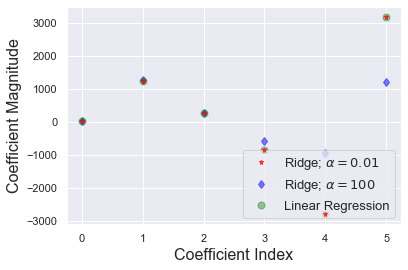

In [105]:
plt.plot(rr_new.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr_new100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr1.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [106]:
rr_new10 = Ridge(alpha=10)
rr_new10.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [107]:
Ridge_train_score_new10 = rr_new10.score(X_train,y_train)
Ridge_test_score_new10 = rr_new10.score(X_test, y_test)
print("Ridge Regression TRAIN Score Low ALPHA:", Ridge_train_score_new10)
print ("Ridge Regression TEST Score Low ALPHA:", Ridge_test_score_new10)

Ridge Regression TRAIN Score Low ALPHA: 0.7023658844725391
Ridge Regression TEST Score Low ALPHA: 0.6926725161486511


In [108]:
rr_new500 = Ridge(alpha=500) #  comparison with alpha value
rr_new500.fit(X_train, y_train)

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
Ridge_train_score_new500 = rr_new500.score(X_train,y_train)
Ridge_test_score_new500 = rr_new500.score(X_test, y_test)
print("Ridge Regression TRAIN Score High ALPHA:", Ridge_train_score_new500)
print ("Ridge Regression TEST Score High ALPHA:", Ridge_test_score_new500)

Ridge Regression TRAIN Score High ALPHA: 0.7008229249834381
Ridge Regression TEST Score High ALPHA: 0.6913829761355844


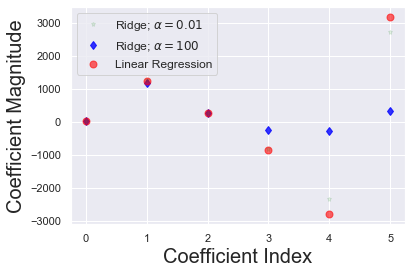

In [112]:
plt.plot(rr_new10.coef_,alpha=0.10,linestyle='none',marker='*',markersize=5,color='green',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr_new500.coef_,alpha=0.8,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr1.coef_,alpha=0.6,linestyle='none',marker='o',markersize=7,color='red',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=20)
plt.ylabel('Coefficient Magnitude',fontsize=20)
plt.legend(fontsize=12,loc=2)
plt.show()

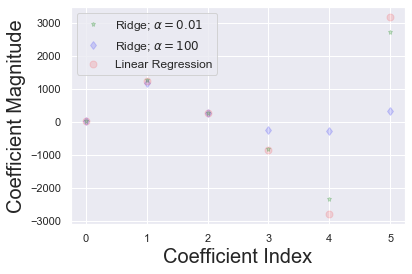

In [113]:
plt.plot(rr_new10.coef_,alpha=0.20,linestyle='none',marker='*',markersize=5,color='green',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr_new500.coef_,alpha=0.15,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr1.coef_,alpha=0.12,linestyle='none',marker='o',markersize=7,color='red',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=20)
plt.ylabel('Coefficient Magnitude',fontsize=20)
plt.legend(fontsize=12,loc=2)
plt.show()

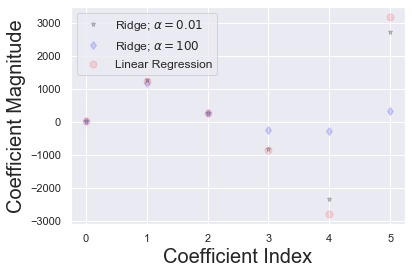

In [114]:
plt.plot(rr_new10.coef_,alpha=0.20,linestyle='none',marker='*',markersize=5,color='black',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr_new500.coef_,alpha=0.15,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr1.coef_,alpha=0.12,linestyle='none',marker='o',markersize=7,color='red',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=20)
plt.ylabel('Coefficient Magnitude',fontsize=20)
plt.legend(fontsize=12,loc=2)
plt.show()

In [ ]:
#LASSO - least absolute shrinkage and selection operator

In [115]:
from sklearn.linear_model import Lasso

In [121]:
X_l = house1.drop(['Price'], axis=1)
Y = house1['Price'].values.reshape(-1,1)
X_l.head(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1


In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_l,Y, test_size=0.2, random_state=31)

In [125]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score_l=lasso.score(X_train,y_train)
test_score_l=lasso.score(X_test,y_test)
coeff_used_l = np.sum(lasso.coef_!=0)

In [126]:
print ("Train score:", train_score_l) 
print ("Test score: ", test_score_l)
print ("Number of FEATURES used: ", coeff_used_l)

Train score: 0.7261798165891236
Test score:  0.491525203919849
Number of FEATURES used:  6


In [128]:
lasso_l = Lasso(alpha=0.01, max_iter=10e5)
lasso_l.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
train_score_nl=lasso_l.score(X_train,y_train)
test_score_nl=lasso_l.score(X_test,y_test)
coeff_used_nl = np.sum(lasso_l.coef_!=0)   

In [130]:
print ("Train Score for ALPHA =0.01:", train_score_nl) 
print ("Test Score for ALPHA =0.01: ", test_score_nl)
print ("Number of FEATURES used: for ALPHA =0.01:", coeff_used_nl)

Train Score for ALPHA =0.01: 0.7261798299595337
Test Score for ALPHA =0.01:  0.4915326030401762
Number of FEATURES used: for ALPHA =0.01: 6


In [132]:
lasso_l1 = Lasso(alpha=0.00001, max_iter=10e5)
lasso_l1.fit(X_train,y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
train_score_nl1=lasso_l1.score(X_train,y_train)
test_score_nl1=lasso_l1.score(X_test,y_test)
coeff_used_nl1 = np.sum(lasso_l1.coef_!=0)  

In [134]:
print ("Train Score for ALPHA =0.00001:", train_score_nl1) 
print ("Test Score for ALPHA =0.00001: ", test_score_nl1)
print ("Number of FEATURES used: for ALPHA = 0.00001:", coeff_used_nl1)

Train Score for ALPHA =0.00001: 0.7261798299608582
Test Score for ALPHA =0.00001:  0.491532676955846
Number of FEATURES used: for ALPHA = 0.00001: 6


In [135]:
lr_new = LinearRegression()
lr_new.fit(X_train,y_train)
lr_train_score_new=lr_new.score(X_train,y_train)
lr_test_score_new=lr_new.score(X_test,y_test)

In [136]:
print ("LR LASSO TRAIN score:", lr_train_score_new) 
print ("LR LASSO TEST score: ", lr_test_score_new)

LR LASSO TRAIN score: 0.7261798299608582
LR LASSO TEST score:  0.49153267703011444


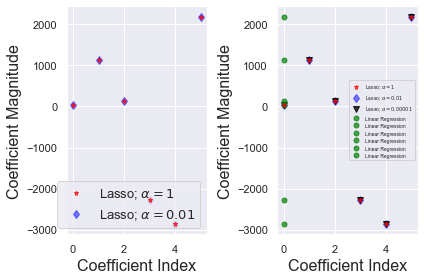

In [137]:
plt.subplot(1,2,1,)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency

plt.plot(lasso_l.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso_l.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')

plt.plot(lasso_l1.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$')
plt.plot(lr_new.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=5,loc=0)
plt.tight_layout()
plt.show()

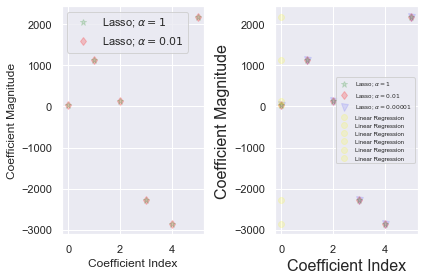

In [138]:
plt.subplot(1,2,1,)
plt.plot(lasso.coef_,alpha=0.15,linestyle='none',marker='*',markersize=7,color='green',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency

plt.plot(lasso_l.coef_,alpha=0.20,linestyle='none',marker='d',markersize=6,color='red',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.legend(fontsize=11,loc=2)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.15,linestyle='none',marker='*',markersize=7,color='green',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso_l.coef_,alpha=0.20,linestyle='none',marker='d',markersize=6,color='red',label=r'Lasso; $\alpha = 0.01$')

plt.plot(lasso_l1.coef_,alpha=0.10,linestyle='none',marker='v',markersize=7,color='blue',label=r'Lasso; $\alpha = 0.00001$')
plt.plot(lr_new.coef_,alpha=0.15,linestyle='none',marker='o',markersize=6,color='yellow',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=6,loc=0)
plt.tight_layout()
plt.show()

In [ ]:
#Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [145]:
log_new = LogisticRegression()  

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.33, random_state=50)

In [147]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432, 2)
(432, 1)
(213, 2)
(213, 1)


In [148]:
log_new.fit(X_train,y_train)

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
pred = log_new.predict(X_test)

In [150]:
log_new.score(X_train,y_train)

0.06018518518518518

In [151]:
log_new.score(X_test,y_test)

0.07511737089201878

In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Raja\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

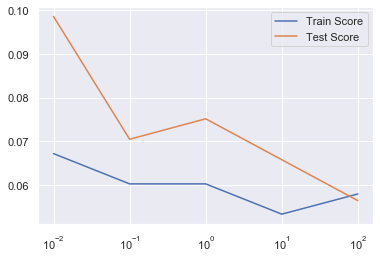

In [153]:
c = [0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for i in c:
    log_new = LogisticRegression(C=i)
    log_new.fit(X_train,y_train)
    train_score.append(log_new.score(X_train,y_train))
    test_score.append(log_new.score(X_test,y_test))
    
plt.plot(c, train_score, label="Train Score")
plt.plot(c, test_score, label="Test Score")
plt.xscale('Log')
plt.legend()

In [154]:
print(train_score)

[0.06712962962962964, 0.06018518518518518, 0.06018518518518518, 0.05324074074074074, 0.05787037037037037]


In [155]:
print(test_score)

[0.09859154929577464, 0.07042253521126761, 0.07511737089201878, 0.06572769953051644, 0.056338028169014086]
